<a href="https://colab.research.google.com/github/Igirisu861/SmartDataProcessing/blob/main/Assignment8_NN_PineappleTeam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style="color:red;font-weight: bold;font-size:40px">Assignment 8 - NN</span>

Imagine you are a data scientist at a leading market research firm that helps companies understand consumer demographics and economic trends. Your company works with businesses, policymakers, and financial institutions to analyze factors that influence income levels, career trajectories, and economic mobility.

Your team has access to the Adult Income Dataset, which contains detailed demographic and occupational data, including features such as age, education, work class, occupation, and work hours per week. Understanding the factors that contribute to higher income levels is essential for economic forecasting, career planning, and workforce development strategies.

Your task is to analyze this dataset, uncover meaningful insights, and develop a predictive model to classify whether an individual's income is greater than $50K per year based on their demographics, education, and employment characteristics.

# Adult Income Dataset - Column Descriptions


**Column Descriptions**

- **`age`**: Age of the individual (numeric).  
- **`workclass`**: Employment sector (e.g., Private, Self-employed, Government).  
- **`education`**: Highest level of education attained (e.g., Bachelors, HS-grad).  
- **`education-num`**: Numerical representation of education level (e.g., Bachelors = 13).  
- **`marital-status`**: Marital status of the individual (e.g., Married, Divorced, Never-married).  
- **`occupation`**: Type of job (e.g., Tech-support, Sales, Craft-repair).  
- **`relationship`**: Relationship status within a household (e.g., Husband, Wife, Own-child).  
- **`race`**: Race of the individual (e.g., White, Black, Asian-Pac-Islander).  
- **`sex`**: Gender (Male/Female).  
- **`capital-gain`**: Income from investments, assets, or other capital sources (numeric).  
- **`capital-loss`**: Capital loss from investments (numeric).  
- **`hours-per-week`**: Number of hours worked per week (numeric).  
- **`native-country`**: Country of origin (e.g., United States, Mexico, Canada).  
- **`TARGET CLASS`**: The target variable indicating income level:  
  - **`<=50K`**: Individual earns **50K or less** per year.  
  - **`>50K`**: Individual earns **more than 50K** per year.  

# Retrieving the data

a) Import libraries (Seaborn, Numpy, and the visualization libraries)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

b) Read the Adult Dataset CSV file and store it as a variable

In [ ]:
df = pd.read_csv('/content/adult_data.csv');
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32551,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32552,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32553,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32554,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


c) Display the first few rows of the IMDB dataset and review its info() and describe() methods.

In [ ]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [ ]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,>50K
count,32556.000000,32556.000000,32556.000000,32556.000000,32556.000000,32556.000000
mean,38.581859,10.081091,1076.870777,87.317238,40.437339,0.240754
std,13.641286,2.572254,7385.359542,402.989709,12.348337,0.427548
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32556 entries, 0 to 32555
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32556 non-null  int64 
 1   workclass       32556 non-null  object
 2   education       32556 non-null  object
 3   education-num   32556 non-null  int64 
 4   marital-status  32556 non-null  object
 5   occupation      32556 non-null  object
 6   relationship    32556 non-null  object
 7   race            32556 non-null  object
 8   sex             32556 non-null  object
 9   capital-gain    32556 non-null  int64 
 10  capital-loss    32556 non-null  int64 
 11  hours-per-week  32556 non-null  int64 
 12  native-country  32556 non-null  object
 13  >50K            32556 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


# Exploratory Data Analysis

1- Create a count plot for the target class (>50K). **(3 pts)**

<Axes: xlabel='>50K', ylabel='count'>

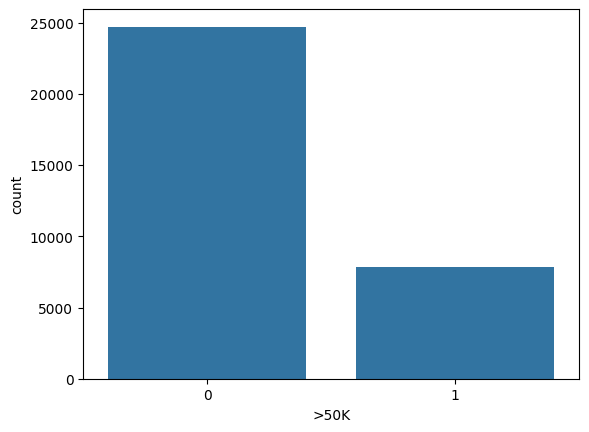

In [ ]:
sns.countplot(x='>50K', data=df)

2- Perform a correlation analysis only for the target class. **(3 pts)**

<Axes: >

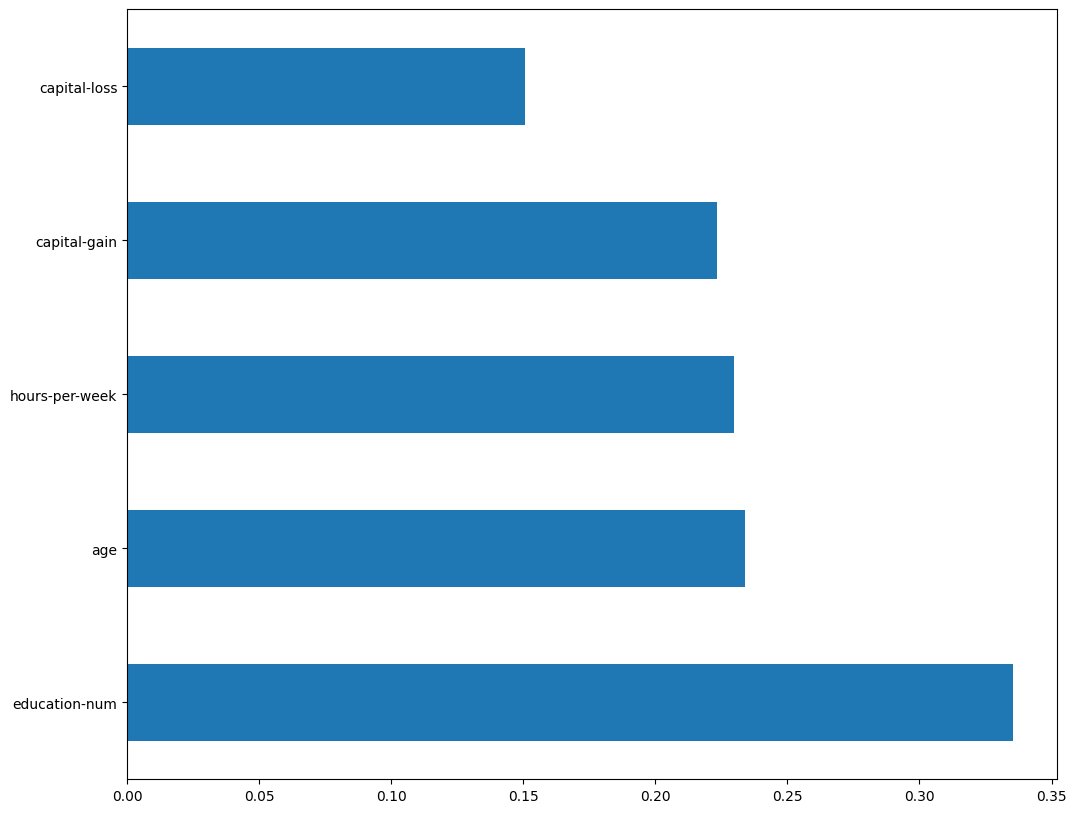

In [ ]:
plt.figure(figsize=[12,10])
df.corr(numeric_only=True)['>50K'][:-1].sort_values(ascending=False).plot(kind='barh')

3- Use the heatmap chart technique to check for missing values. **(3 pts)**

<Axes: >

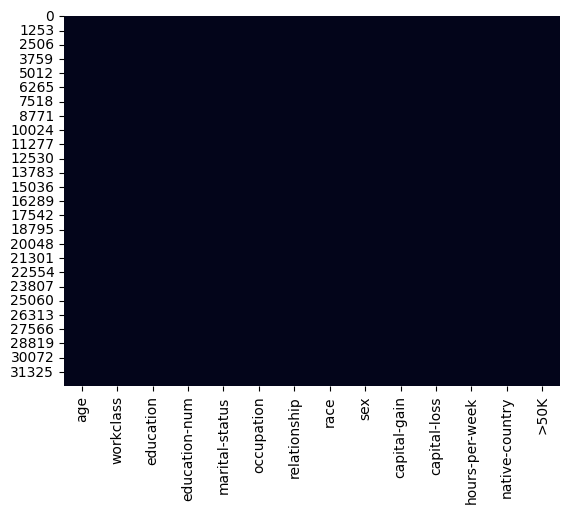

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

** A recommended approach is to obtain the list of columns useful for the Exploratory Analysis step. **

In [ ]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', '>50K'],
      dtype='object')

4- Create a histogram plot for the age feature with KDE enabled. **(3 pts)**

<Axes: xlabel='age', ylabel='Count'>

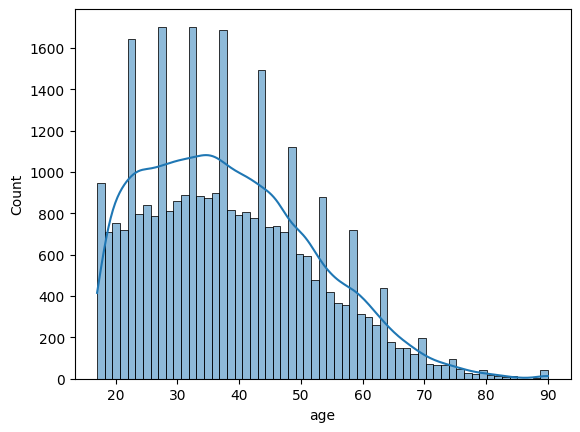

In [ ]:
sns.histplot(df['age'], kde=True)

5- Create a count plot for the workclass feature. Do you notice anything unusual? **3 pts**

<Axes: xlabel='workclass', ylabel='count'>

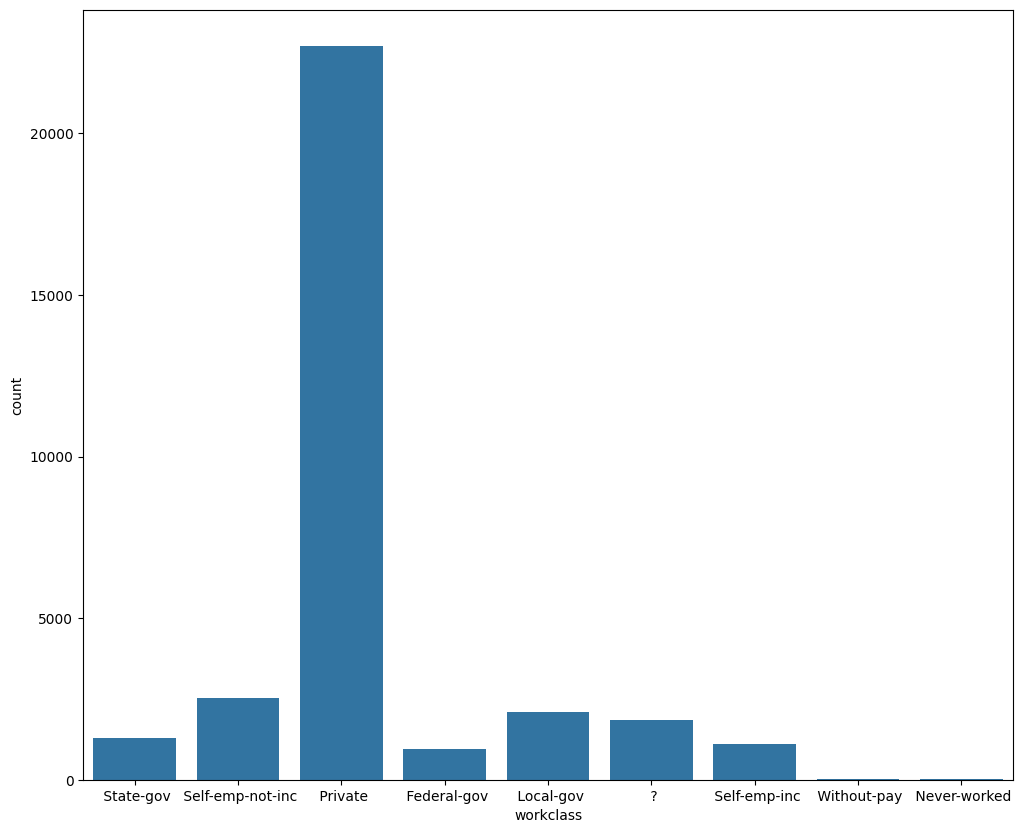

In [ ]:
plt.figure(figsize=[12,10])
sns.countplot(x=df['workclass'], data=df)

6- Retrieve the list of unique values for the education feature. **(2 pts)**

In [ ]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

7- Create a count plot for the education-num feature. **(3 pts)**

<Axes: xlabel='education-num', ylabel='count'>

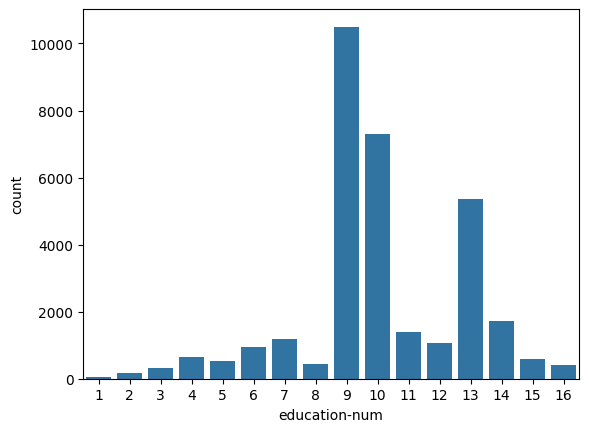

In [ ]:
sns.countplot(df, x=df['education-num'])

8-Create a countplot for the marital status feature. **(3 pts)**

<Axes: xlabel='marital-status', ylabel='count'>

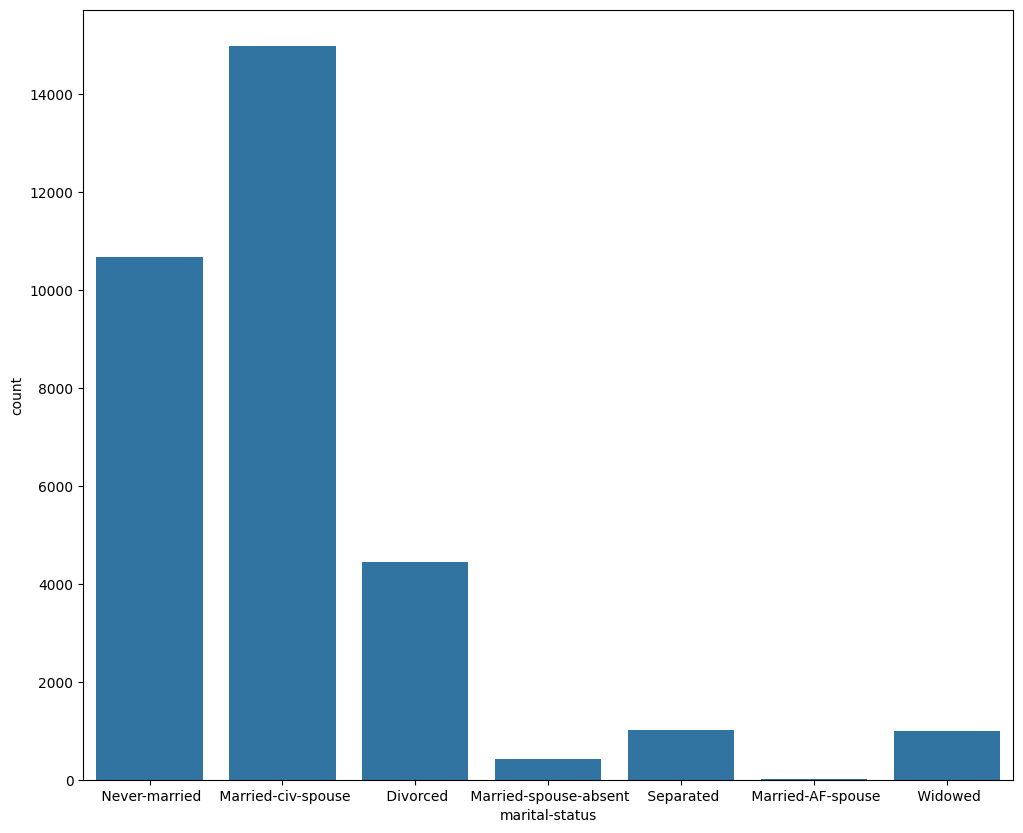

In [ ]:
plt.figure(figsize=[12,10])
sns.countplot(df, x=df['marital-status'])

9- Retrieve the list of unique values for the occupation feature. Do you notice anything unusual? **(2 pts)**

In [ ]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

10- Retrieve the list of unique values for the relationship feature. **(2 pts)**

In [ ]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

11- Create a count plot for the race feature. **(3 pts)**

<Axes: xlabel='race', ylabel='count'>

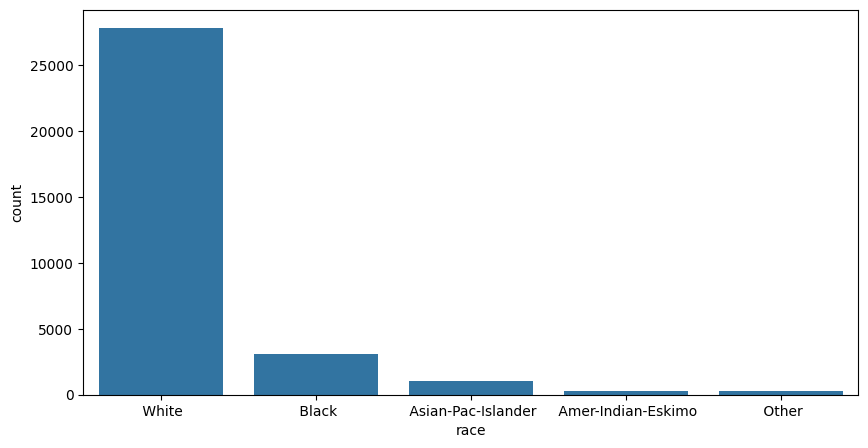

In [ ]:
plt.figure(figsize=[10,5])
sns.countplot(df, x=df['race'])

12- Create a count plot for the sex feature **(3 pts)**

<Axes: xlabel='sex', ylabel='count'>

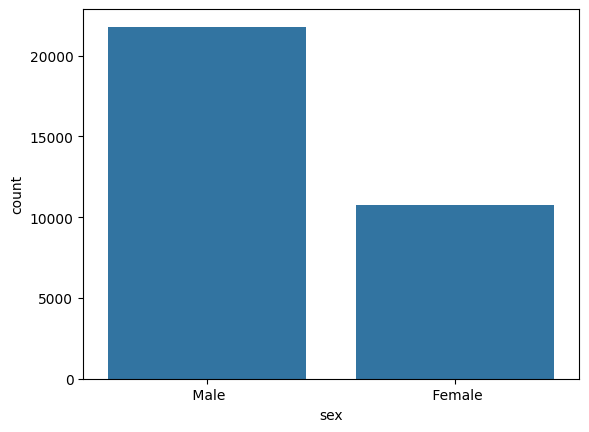

In [ ]:
sns.countplot(df, x=df['sex'])

13- Group by the native country feature, then select the target class, and finally sort the values. **(3 pts)**

In [ ]:
df.groupby('native-country')['>50K'].count().sort_values(ascending=False)

,>50K
native-country,
United-States,29169
Mexico,640
?,583
Philippines,198
Germany,137
Canada,120
Puerto-Rico,114
El-Salvador,106
India,100


# Data Pre-processing

## Removing leading and trailing spaces in categorical values

14- Categorical columns appear to have leading spaces. Remove them using the str.strip() function.

Tip: Create a list of categorical columns and use the apply() function with a lambda function to remove leading spaces from the DataFrame. **(4 pts)**

In [ ]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.strip())
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32551,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32552,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32553,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32554,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [ ]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

## Dealing with Missing Data

15- Two features contain a '?' value. The recommended approach is to replace it with the most frequent category (mode) in each feature. **(10 pts)**

**Work class feature**

In [ ]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
workclass_mode = df['workclass'].mode()[0]
df['workclass'] = df['workclass'].replace('?', workclass_mode)
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

**Occupation feature**

In [ ]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [ ]:
occupation_mode = df['occupation'].mode()[0]
df['occupation'] = df['occupation'].replace('?', occupation_mode)
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

## Feature engineering

16- Create a new feature using the formula: capital-net = capital-gain - capital-loss. **(5 pts)**

In [ ]:
df['capital-net'] = df['capital-gain'] - df['capital-loss']

## Dropping columns

17- Drop the following features: education, capital-gain, capital-loss, and native-country.

Why do you think dropping these columns is desirable? **(3 pts)**

In [ ]:
df = df.drop(['education', 'capital-gain', 'capital-loss', 'native-country'], axis=1)
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,>50K,capital-net
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,0,2174
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,0,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,0,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,0,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...
32551,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,0,0
32552,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,1,0
32553,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,0,0
32554,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,20,0,0


It is desirable since some are categorical and it doesn't have much correlation to the target variable as other variables. Also, some other columns represent the categorical data with numbers, like in education's case. Therefore, there is no need to keep these columns

## Creating Dummy columns

One-hot encoding is a way to convert words (categories) into numbers so that a machine learning model can understand them.

Guidelines for One-Hot Encoding: Recommended Limits

- **≤10 unique categories** → One-hot encoding is fine.  
- **10–20 unique categories** → Consider merging similar categories or using embedding layers (for deep learning).  
- **>20 unique categories** → Use target encoding, frequency encoding, or embeddings instead.
  
**What is Multicollinearity?**
Multicollinearity occurs when one feature can be perfectly predicted from others, which can negatively impact model stability, especially in linear models.

**How One-Hot Encoding Causes It**

One-hot encoding converts categorical features into multiple binary columns. Since one category can always be inferred from the others, this creates redundant information, leading to perfect correlation.

**Fix: Drop One Column Per Encoded Feature**

To avoid redundancy, drop one dummy variable per category using `drop_first=True` in one-hot encoding. This removes unnecessary correlations while preserving all necessary information.

18- Create dummy variables for the categorical columns.

Tip: First, create a list of the remaining categorical columns to simplify the process. Use dtype=int to ensure the dummy variables are stored as binary (0/1) instead of Boolean (True/False). **(7 pts)**

In [ ]:
df.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', '>50K', 'capital-net'],
      dtype='object')

In [ ]:
columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

In [ ]:
df = pd.get_dummies(df, columns=columns, drop_first=True, dtype=int)

In [ ]:
df.head()

,age,education-num,hours-per-week,>50K,capital-net,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,13,40,0,2174,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,50,13,13,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,38,9,40,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
3,53,7,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,13,40,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


## Split the data

19- Define X for the independent variables and Y for the dependent variable (target class). Then, split the data into training and testing sets. **(3 pts)**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('>50K', axis=1).values
y = df['>50K'].values

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=101)

## Data scaling

20- Scale the numerical columns (excluding categorical columns) using MinMaxScaler.

Tip: First, create a list of the numerical columns to simplify the process.

Warning: Fit and transform X_train, but only transform X_test.

Note: Ensure all necessary import statements are included. **(7 pts)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
Xtrain[:, :4] = scaler.fit_transform(Xtrain[:, :4])
Xtest[:, :4] = scaler.transform(Xtest[:, :4])

# Model training

21- Create a Sequential Neural Network with two hidden layers structured as follows:

1st hidden layer: 64 neurons
2nd hidden layer: 32 neurons

The optimizer should be Adam, and the loss function should be binary cross-entropy.

Implement early stopping, monitoring val_loss, with mode='min' and patience=20.

**Warning: Convert the training and testing sets to NumPy arrays, as TensorFlow performs more efficiently with NumPy arrays than with Pandas DataFrames.**

Note: Ensure all necessary import statements are included. **(10 pts)**

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=Xtrain.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

22- Plot Training and Validation Loss. **(2 pts)**

In [ ]:
model.fit(x=Xtrain, y=ytrain, epochs=600, validation_data=(Xtest, ytest), callbacks=[early_stop])

Epoch 1/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.4596 - val_loss: 0.3794
Epoch 2/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.3847 - val_loss: 0.3769
Epoch 3/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.3863 - val_loss: 0.3769
Epoch 4/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3799 - val_loss: 0.3760
Epoch 5/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3707 - val_loss: 0.3764
Epoch 6/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3745 - val_loss: 0.3770
Epoch 7/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3753 - val_loss: 0.3781
Epoch 8/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3775 - val_loss: 0.3779
Epoch 9/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3768 - val_loss: 0.3812
Epoch 10/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3800 - val_loss: 0.3788
Epoch 11/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3752 - val_loss: 0.3779
Epoch 12/600
713/713 ━━━━━━━━━━━━━━━━━━━━

<Axes: >

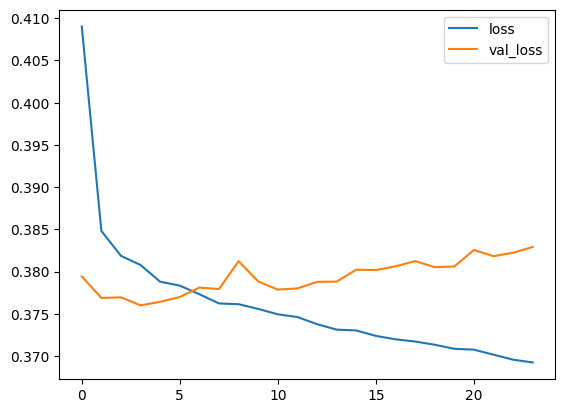

In [ ]:
df_loss = pd.DataFrame(model.history.history)
df_loss.plot()

Based on the graph, the model isn't doing that well

# Model evaluation

23- Print the classification report.

Tip: First, obtain the predicted probabilities, then convert them into class labels. **(5 pts)**

In [ ]:
model.predict(Xtest)

306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.19072038],
       [0.55293256],
       [0.17069338],
       ...,
       [0.5260105 ],
       [0.02694475],
       [0.02991662]], dtype=float32)

In [ ]:
y_pred = model.predict(Xtest)
y_pred_class = (y_pred > 0.5).astype(int)

306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytest, y_pred_class))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      7457
           1       0.63      0.57      0.60      2310

    accuracy                           0.82      9767
   macro avg       0.75      0.73      0.74      9767
weighted avg       0.81      0.82      0.82      9767



We can see that the predictions aren't great. The results are quite bad with the current model configuration.

24- Enhance the Neural Network by adding a Dropout layer with a rate of 0.3 to the hidden layers.

Plot Training and Validation Loss again.

Print the classification report again. **(8 pts)**

In [ ]:
from keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=Xtrain.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [ ]:
model.fit(x=Xtrain, y=ytrain, epochs=600, validation_data=(Xtest, ytest), callbacks=[early_stop])

Epoch 1/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.4764 - val_loss: 0.3845
Epoch 2/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.4031 - val_loss: 0.3797
Epoch 3/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3858 - val_loss: 0.3789
Epoch 4/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3961 - val_loss: 0.3768
Epoch 5/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3932 - val_loss: 0.3780
Epoch 6/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3887 - val_loss: 0.3797
Epoch 7/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3863 - val_loss: 0.3761
Epoch 8/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3901 - val_loss: 0.3758
Epoch 9/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3816 - val_loss: 0.3757
Epoch 10/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3867 - val_loss: 0.3761
Epoch 11/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3853 - val_loss: 0.3758
Epoch 12/600
713/713 ━━━━━━━━━━━━━━━━━━━━

<Axes: >

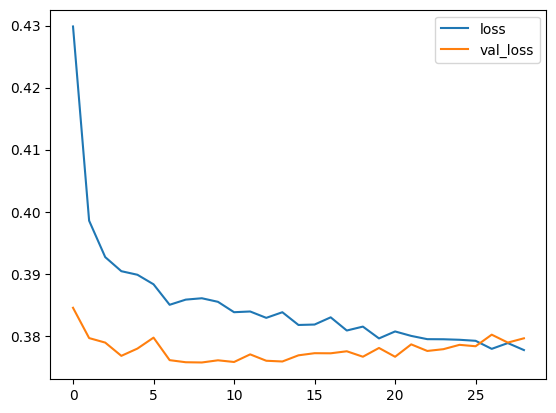

In [ ]:
df_loss = pd.DataFrame(model.history.history)
df_loss.plot()

It is better in this graph!

In [ ]:
model.predict(Xtest)

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.18865357],
       [0.5663117 ],
       [0.19581982],
       ...,
       [0.49620128],
       [0.01772498],
       [0.02805682]], dtype=float32)

In [ ]:
y_pred = model.predict(Xtest)
y_pred_class = (y_pred > 0.5).astype(int)

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print(classification_report(ytest, y_pred_class))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      7457
           1       0.65      0.49      0.56      2310

    accuracy                           0.82      9767
   macro avg       0.75      0.71      0.72      9767
weighted avg       0.81      0.82      0.81      9767



This classification report kinda does better in some areas, but worse in others

## BOUNS: Can the Model Be Improved? Let's Try!

Feel free to add extra hidden layers or any other modifications you believe may enhance performance.

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=Xtrain.shape[1], activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
model.fit(x=Xtrain, y=ytrain, epochs=600, validation_data=(Xtest, ytest), callbacks=[early_stop])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.5133 - val_loss: 0.3925
Epoch 2/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4266 - val_loss: 0.3908
Epoch 3/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4096 - val_loss: 0.3849
Epoch 4/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4046 - val_loss: 0.3913
Epoch 5/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3998 - val_loss: 0.3816
Epoch 6/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4022 - val_loss: 0.3851
Epoch 7/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3953 - val_loss: 0.3809
Epoch 8/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3976 - val_loss: 0.3788
Epoch 9/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3908 - val_loss: 0.3784
Epoch 10/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3950 - val_loss: 0.3832
Epoch 11/600
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3994 - val_loss: 0.3812
Epoch 12/600
713/713 ━━━━━━━━━━━━━━━━━━━━

<Axes: >

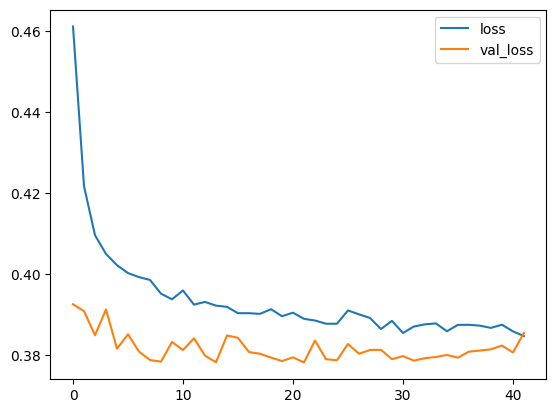

In [ ]:
df_loss = pd.DataFrame(model.history.history)
df_loss.plot()

In [ ]:
model.predict(Xtest)
y_pred = model.predict(Xtest)
y_pred_class = (y_pred > 0.5).astype(int)
print(classification_report(ytest, y_pred_class))

306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7457
           1       0.61      0.61      0.61      2310

    accuracy                           0.82      9767
   macro avg       0.74      0.75      0.75      9767
weighted avg       0.82      0.82      0.82      9767



After adding another two hidden layers and making the dropout from 0.3 to 0.4 has worked for making the grade better. It's still not perfect, but it improved